<a href="https://colab.research.google.com/github/JakeOh/202105_itw_bd26/blob/main/lab_ml/ml05_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* Machine Learning(기계 학습)
    * 지도학습(Superivised Learning): 레이블이 있는 데이터를 학습
        * 분류(Classification): 클래스 분류
        * 회귀(Regression): 숫자 예측
    * 비지도학습(Unsupervised Learning): 레이블이 없는 데이터를 학습
    * 강화학습(Reinforcement Learning): 보상/벌칙을 통해서 학습

# Objectives

Fish 데이터 셋에서 농어(Perch)의 무게(Weight)를 예측

* 농어의 길이(Length)로만 무게 예측 - KNN, Linear Regression
* 농어의 여러가지 특성들(Length, Diagonal, Height, Width)로 무게 예측 - Linear Regression

# Imports

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor  # ML 모델
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures  # 다차항 (독립)변수를 추가해 주는 변환기
from sklearn.preprocessing import StandardScaler  # 표준화 변환기
from sklearn.pipeline import Pipeline  # 변환기와 추정기를 연결해 주는 클래스

# 데이터 준비

In [2]:
fish_csv = 'https://github.com/rickiepark/hg-mldl/raw/master/fish.csv'

In [3]:
fish = pd.read_csv(fish_csv)

In [4]:
fish.tail()

,Species,Weight,Length,Diagonal,Height,Width
154,Smelt,12.2,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,14.3,15.2,2.8728,2.0672
158,Smelt,19.9,15.0,16.2,2.9322,1.8792


In [5]:
# fish DataFrame에서 'Perch'(농어) 어종만 선택
perch = fish[fish.Species == 'Perch']

In [6]:
perch.head()

,Species,Weight,Length,Diagonal,Height,Width
72,Perch,5.9,8.4,8.8,2.1120,1.4080
73,Perch,32.0,13.7,14.7,3.5280,1.9992
74,Perch,40.0,15.0,16.0,3.8240,2.4320
75,Perch,51.5,16.2,17.2,4.5924,2.6316
76,Perch,70.0,17.4,18.5,4.5880,2.9415


In [7]:
perch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56 entries, 72 to 127
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   56 non-null     object 
 1   Weight    56 non-null     float64
 2   Length    56 non-null     float64
 3   Diagonal  56 non-null     float64
 4   Height    56 non-null     float64
 5   Width     56 non-null     float64
dtypes: float64(5), object(1)
memory usage: 3.1+ KB


농어의 길이(Length)를 알면 무게(Weight) 예측할 수 있을까?

* 독립변수(feature) - Length
* 종속변수(label, target) - Weight

In [8]:
# 종속변수
perch_weight = perch['Weight'].values
perch_weight  # label은 1d array

array([   5.9,   32. ,   40. ,   51.5,   70. ,  100. ,   78. ,   80. ,
         85. ,   85. ,  110. ,  115. ,  125. ,  130. ,  120. ,  120. ,
        130. ,  135. ,  110. ,  130. ,  150. ,  145. ,  150. ,  170. ,
        225. ,  145. ,  188. ,  180. ,  197. ,  218. ,  300. ,  260. ,
        265. ,  250. ,  250. ,  300. ,  320. ,  514. ,  556. ,  840. ,
        685. ,  700. ,  700. ,  690. ,  900. ,  650. ,  820. ,  850. ,
        900. , 1015. ,  820. , 1100. , 1000. , 1100. , 1000. , 1000. ])

In [9]:
# 독립변수
perch_length = perch[['Length']].values
perch_length  # feature는 2d array

array([[ 8.4],
       [13.7],
       [15. ],
       [16.2],
       [17.4],
       [18. ],
       [18.7],
       [19. ],
       [19.6],
       [20. ],
       [21. ],
       [21. ],
       [21. ],
       [21.3],
       [22. ],
       [22. ],
       [22. ],
       [22. ],
       [22. ],
       [22.5],
       [22.5],
       [22.7],
       [23. ],
       [23.5],
       [24. ],
       [24. ],
       [24.6],
       [25. ],
       [25.6],
       [26.5],
       [27.3],
       [27.5],
       [27.5],
       [27.5],
       [28. ],
       [28.7],
       [30. ],
       [32.8],
       [34.5],
       [35. ],
       [36.5],
       [36. ],
       [37. ],
       [37. ],
       [39. ],
       [39. ],
       [39. ],
       [40. ],
       [40. ],
       [40. ],
       [40. ],
       [42. ],
       [43. ],
       [43. ],
       [43.5],
       [44. ]])

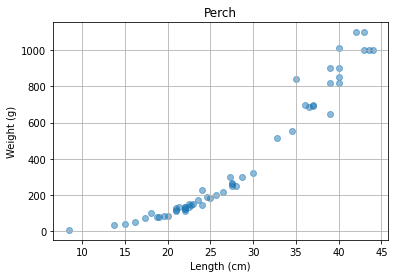

In [10]:
# Weight ~ Length scatter plot
plt.scatter(perch_length, perch_weight, alpha=0.5)
plt.title('Perch')
plt.xlabel('Length (cm)')
plt.ylabel('Weight (g)')
plt.grid()
plt.show()

In [11]:
# X: 특성 행렬(2d array), y: 타겟 벡터(1d array)
X = perch_length.copy()
y = perch_weight.copy()

In [12]:
X.shape, y.shape

((56, 1), (56,))

# Train/test split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=42)
# shuffle=True(default): random sampling이 기본값

In [14]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((42, 1), (14, 1), (42,), (14,))

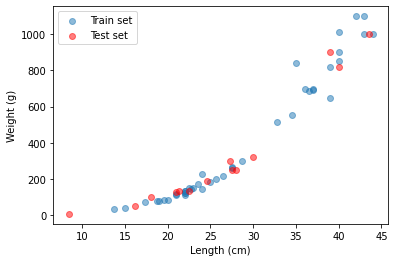

In [15]:
# train/test set 시각화
plt.scatter(X_train, y_train, label='Train set', alpha=0.5)
plt.scatter(X_test, y_test, label='Test set', alpha=0.5, color='red')
plt.xlabel('Length (cm)')
plt.ylabel('Weight (g)')
plt.legend()
plt.show()

# KNN Regressor 모델 훈련, 평가

KNN Regressor: 가장 가까운 k개의 이웃들의 레이블(타겟)의 평균값으로 숫자를 예측.

In [16]:
knn_reg = KNeighborsRegressor()  # k=5인 KNN 모델 생성

In [17]:
knn_reg.fit(X_train, y_train)  # 모델 훈련

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [18]:
train_pred = knn_reg.predict(X_train)  # train set의 예측값
train_pred

array([  88.6,  123. ,   79.6,   70.6,  723. ,  193. ,  847. ,  847. ,
       1010. ,  123. ,   95. ,  123. ,  174. ,  248. , 1010. ,  847. ,
        174. ,  113. ,  248. ,  847. ,  659. ,  224. ,  723. ,   60. ,
        140. ,   60. ,  719. ,  694.2,  248. ,  167. ,  847. ,  113. ,
        168. ,  123. , 1010. ,  136. ,   79.6,  719. ,  123. ,  193. ,
        990. ,  659. ])

In [19]:
y_train  # train set의 실젯값

array([  85.,  135.,   78.,   70.,  700.,  180.,  850.,  820., 1000.,
        120.,   85.,  130.,  225.,  260., 1100.,  900.,  145.,  115.,
        265., 1015.,  514.,  218.,  685.,   32.,  145.,   40.,  690.,
        840.,  300.,  170.,  650.,  110.,  150.,  110., 1000.,  150.,
         80.,  700.,  120.,  197., 1100.,  556.])

In [20]:
# MSE(Mean Squared Errors): 오차 제곱의 평균
# RMSE(Root Mean Squared Errors): 오차 제곱의 평균의 제곱근
print('MSE:', mean_squared_error(y_train, train_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_train, train_pred)))

MSE: 3716.5161904761903
RMSE: 60.96323638453089


In [21]:
# MAE(Mean Absolute Errors): 오차 절대값의 평균
mean_absolute_error(y_train, train_pred)

35.76190476190476

일반적인 평가 지표는 점수가 높을 수록 좋은 모델, 점수가 낮을 수록 나쁜 모델.

그런데, 회귀 문제에서는 오차는 작을 수록 좋은 모델이고, 오차가 클 수록 나쁜 모델.

회귀에서도 점수가 높을 수록(1에 가까울 수록) 좋은 모델이고, 점수 낮을 수록 나쁜 모델로 평가할 수 있는 지표 개발 ---> $R^2$ score

In [22]:
# R^2 score(결정 계수): 1에 가까울 수록 오차가 적은 모델, 더 좋은 모델.
r2_score(y_train, train_pred)

0.9698823289099254

* $ y_i $ : $i$번째 샘플의 실젯값(label)
* $ \hat{y_i} $ : $i$번째 샘플의 예측값
* $ \bar{y} $ : 타겟의 평균값
* $ n $ : 샘플 개수

* MAE(Mean Absolute Errors)
$$
MAE = \frac{1}{n} \sum_{i=1}^{n} \lvert y_i - \hat{y_i} \rvert
$$

* MSE(Mean Squared Errors)
$$
MSE = \frac{1}{n} \sum_{i=1}^{n} ( y_i - \hat{y_i} )^2
$$

* RMSE(Root Mean Squared Errors)
$$
RMSE = \sqrt{ \frac{1}{n} \sum_{i=1}^{n} ( y_i - \hat{y_i} )^2 }
$$

* $ R^2 $ score(Coefficient of determinant, 결정 계수)
$$
R^2 = 1 - \dfrac{ \sum_{i=1}^{n} (y_i - \hat{y_i})^2 }
                { \sum_{i=1}^{n} (y_i - \bar{y})^2 }
$$
    * 결정 계수는 최댓값이 1이 되도록 만든 평가 지표.
    * 모델이 타겟을 오차없이 정확하게 예측하면, 실제값 - 예측값 = 0 이므로, 결정 계수는 최댓값 1이 됨.
    * 모델이 타겟을 매우 비슷하게 예측하면, 오차가 매우 작으면 분자가 0에 가까운 값이 되므로, 결정 계수는 1보다는 작지만 1에 가까운 값이 됨.
    * 모델이 타겟의 평균으로만 예측하는 정도라면, (분자) = (분모) 이므로, 결정 계수는 0이 됨.
    * 모델이 타겟의 평균 정도도 예측하지 못하면(오차가 매우 크면), (분자) > (분모)일 수 있고, 그런 경우 결정 계수는 음수가 될 수 있음.

In [23]:
# 테스트 셋의 결정 계수(R^2 score)
test_pred = knn_reg.predict(X_test)
r2_score(y_test, test_pred)
#> train set R^2 < test set R^2: 과소적합(underfitting)

0.992809406101064

# k값에 따른 $R^2$ 시각화

In [24]:
train_scores = []  # train set의 결정 계수(R^2)들을 저장할 리스트
test_scores = []  # test set의 결정 계수(R^2)들을 저장할 리스트

k_values = np.arange(1, 15)
for k in k_values:  # 1 ~ 14까지 k값에 따라서 반복
    knn = KNeighborsRegressor(n_neighbors=k)  # KNN 회귀 모델 생성
    knn.fit(X_train, y_train)  # 모델 훈련
    # 훈련 셋 평가 점수 계산, 저장
    train_pred = knn.predict(X_train)
    train_r2 = r2_score(y_train, train_pred)
    train_scores.append(train_r2)
    # 테스트 셋 평가 점수 계산, 저장
    test_pred = knn.predict(X_test)
    test_r2 = r2_score(y_test, test_pred)
    test_scores.append(test_r2)

In [25]:
train_scores

[0.9852830341215901,
 0.9828437127041165,
 0.9804899950518966,
 0.978211389719245,
 0.9698823289099254,
 0.9757140960298665,
 0.9761170732051527,
 0.9697604397763201,
 0.9693310367551284,
 0.96164569026043,
 0.9515761381539326,
 0.9467103631225754,
 0.9413423450130075,
 0.9429470576557883]

In [26]:
test_scores

[0.991309195814175,
 0.9725010241788556,
 0.9746459963987609,
 0.9840231023848637,
 0.992809406101064,
 0.9855001139899048,
 0.9781383949643516,
 0.9780541148735824,
 0.9692647749722698,
 0.9737908255822255,
 0.970279643030474,
 0.967703620310643,
 0.9639044643206888,
 0.9615046463124021]

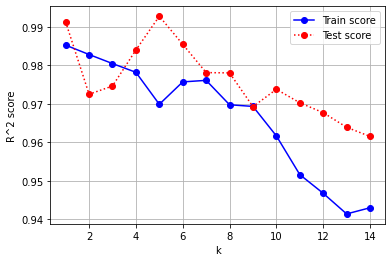

In [27]:
plt.plot(k_values, train_scores, 'bo-', label='Train score')
plt.plot(k_values, test_scores, 'ro:', label='Test score')
plt.xlabel('k')
plt.ylabel('R^2 score')
plt.grid()
plt.legend()
plt.show()

# KNN Regressor 모델의 문제점

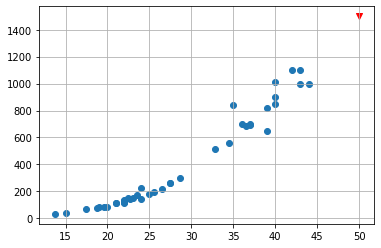

In [28]:
# train set 시각화
plt.scatter(X_train, y_train)

# 길이가 50cm, 무게가 1,500g인 가상의 농어(perch) 데이터
test_fish_l = [[50]]  # 특성 - 2차원 배열
test_fish_w = [1_500]  # 레이블 - 1차원 배열
plt.scatter(test_fish_l, test_fish_w, color='red', marker='v')

plt.grid()
plt.show()

In [29]:
# k=5인 KNN 회귀 모델로 가상의 물고기 데이터 예측값 계산
test_fish_pred = knn_reg.predict(test_fish_l)
test_fish_pred

array([1010.])

In [30]:
# KNN 모델에서 가장 가까운 이웃 찾기
neigh_indices = knn_reg.kneighbors(X=test_fish_l, return_distance=False)
print(neigh_indices)     # 2d array
print(neigh_indices[0])  # 1d array

[[34 14  8 40  6]]
[34 14  8 40  6]


In [31]:
# 가장 가까운 이웃 5개 생선의 Length
X_train[neigh_indices[0]]

array([[44.],
       [43.],
       [43.],
       [42.],
       [40.]])

In [32]:
# 가장 가까운 이웃 5개 생선의 Weight
y_train[neigh_indices[0]]

array([1000., 1100., 1000., 1100.,  850.])

* 머신 러닝 알고리즘
    * 사례 기반 학습(instance-based learning): KNN
    * 모델 기반 학습(model-based learning): Linear Regression

# Linear Regression

In [33]:
X_train[:5]

array([[19.6],
       [22. ],
       [18.7],
       [17.4],
       [36. ]])

In [34]:
y_train[:5]

array([ 85., 135.,  78.,  70., 700.])

In [35]:
lin_reg = LinearRegression()  # 선형 회귀 모델 생성

In [36]:
lin_reg.fit(X_train, y_train)  # 선형 회귀 모델 훈련
# y_hat = w_0 + w_1 * X 예측값과 실제값 y 사이의 오차(y - y_hat)를 최소화하는 w_0, w_1을 찾는 과정.

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
lin_reg.coef_  # w_1: 직선의 기울기(slope). 농어의 길이에 곱해주는 가중치(weight).
#> 1차원 배열

array([39.01714496])

In [38]:
lin_reg.intercept_  # w_0: y 절편. 편향(bias).
#> 숫자 1개

-709.0186449535477

$
\hat{y_i} = -709.01 + 39.01 \times x_i 
$

[10 50]
[-318.84719532 1241.83860323]


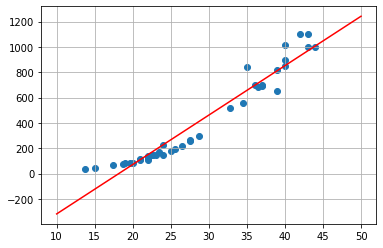

In [39]:
# 훈련 셋과 직선의 방정식(선형 회귀식) 시각화
plt.scatter(X_train, y_train)

x = np.array([10, 50])
y = lin_reg.intercept_ + lin_reg.coef_[0] * x  # y = w0 + w1 * x
print(x)
print(y)
plt.plot(x, y, 'r')

plt.grid()
plt.show()

In [40]:
# 훈련 셋의 예측값
train_pred = lin_reg.predict(X_train)
train_pred

array([  55.71739633,  149.35854425,   20.60196587,  -30.12032259,
        695.59857374,  266.40997914,  851.66715359,  812.65000863,
        968.71858848,  149.35854425,   71.32425432,  149.35854425,
        227.39283417,  363.95284155,  968.71858848,  851.66715359,
        227.39283417,  110.34139928,  363.95284155,  851.66715359,
        570.74370985,  324.93569658,  715.10714622, -174.48375895,
        176.67054572, -123.7614705 ,  734.6157187 ,  656.58142877,
        410.7734155 ,  207.88426169,  812.65000863,  110.34139928,
        188.37568921,  149.35854425, 1007.73573345,  168.86711673,
         32.30710936,  734.6157187 ,  149.35854425,  289.82026612,
        929.70144352,  637.07285629])

In [41]:
y_train  # 실젯값

array([  85.,  135.,   78.,   70.,  700.,  180.,  850.,  820., 1000.,
        120.,   85.,  130.,  225.,  260., 1100.,  900.,  145.,  115.,
        265., 1015.,  514.,  218.,  685.,   32.,  145.,   40.,  690.,
        840.,  300.,  170.,  650.,  110.,  150.,  110., 1000.,  150.,
         80.,  700.,  120.,  197., 1100.,  556.])

In [42]:
# train set의 RMSE
np.sqrt(mean_squared_error(y_train, train_pred))
#> 86.16
#> KNN Regressor의 RMSE 60.96와 비교해서 오차가 더 커졌음.

86.1565641875869

In [43]:
# train set의 결정 계수
r2_score(y_train, train_pred)
#> 0.94
#> KNN Regressor의 결정 계수 0.97과 비교해서 더 작아졌음.

0.939846333997604

In [44]:
# test set의 예측값
test_pred = lin_reg.predict(X_test)
test_pred

array([-381.27462726,   -6.71003561,  363.95284155,  122.04654277,
        168.86711673,  851.66715359,  461.49570396,  250.80312115,
        812.65000863,  110.34139928,  988.22716096,  -76.94089654,
        383.46141403,  356.14941255])

In [45]:
y_hat = lin_reg.intercept_ + lin_reg.coef_[0] * X_test
y_hat[:5]

array([[-381.27462726],
       [  -6.71003561],
       [ 363.95284155],
       [ 122.04654277],
       [ 168.86711673]])

In [46]:
# test set의 실젯값
y_test

array([   5.9,  100. ,  250. ,  130. ,  130. ,  820. ,  320. ,  188. ,
        900. ,  125. , 1000. ,   51.5,  250. ,  300. ])

In [47]:
# test set의 RMSE
np.sqrt(mean_squared_error(y_test, test_pred))

132.6283000640858

In [48]:
# test set의 결정 계수
r2_score(y_test, test_pred)  #> KNN보다 안 좋은 모델

0.8247503123313558

In [49]:
# 50cm, 1,500g 가상의 물고기 예측
y_hat = lin_reg.intercept_ + lin_reg.coef_ * 50
y_hat  #> 1,242g - KNN의 1,010g 예측값보다 좋은 결과.

array([1241.83860323])

# 2차 항(polynomial)을 포함하는 선형 회귀

In [50]:
X_train[:5]

array([[19.6],
       [22. ],
       [18.7],
       [17.4],
       [36. ]])

In [51]:
X_train.shape

(42, 1)

In [52]:
# x^2 항을 추가해서 (n_samples, 2) shape을 갖는 2차원 배열 만듦.
X_train_poly = np.c_[X_train, X_train ** 2]
X_train_poly[:5]

array([[  19.6 ,  384.16],
       [  22.  ,  484.  ],
       [  18.7 ,  349.69],
       [  17.4 ,  302.76],
       [  36.  , 1296.  ]])

In [53]:
X_train_poly.shape

(42, 2)

In [54]:
lin_reg2 = LinearRegression()

In [55]:
lin_reg2.fit(X_train_poly, y_train)
# 2차 항이 포함된 train set을 학습시킴
# -> 예측값 y_hat = w0 + w1 * x + w2 * x^2 과 실제값 y 사이의 오차가 최소가 되는 w0, w1, w2를 찾는 과정.

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
lin_reg2.coef_  #> [w1 w2]: 가중치 벡터(weights)

array([-21.55792498,   1.01433211])

In [57]:
lin_reg2.intercept_  #> w0: 절편(intercept), 편향(bias)

116.05021078278378

$
\hat{y_i} = w_0 + w_1 * x_i + w_2 * x_i^2
$

In [58]:
# train set의 예측값, RMSE, R^2 score
train_pred = lin_reg2.predict(X_train_poly)
rmse = np.sqrt(mean_squared_error(y_train, train_pred))
print('RMSE:', rmse)
r2 = r2_score(y_train, train_pred)
print('R^2:', r2)

RMSE: 60.149744308383944
R^2: 0.9706807451768623


In [59]:
# 길이 50cm 농어의 무게 예측
116.1 + (-21.6 * 50 + 1.0 * 50 ** 2)

1536.1

In [60]:
X_test[:5]

array([[ 8.4],
       [18. ],
       [27.5],
       [21.3],
       [22.5]])

In [61]:
# X_test에 X_test의 2차항을 포함시킨 2차원 배열
X_test_poly = np.c_[X_test, X_test ** 2]
X_test_poly[:5]

array([[  8.4 ,  70.56],
       [ 18.  , 324.  ],
       [ 27.5 , 756.25],
       [ 21.3 , 453.69],
       [ 22.5 , 506.25]])

In [62]:
# test set의 예측값
test_pred = lin_reg2.predict(X_test_poly)
test_pred[:5]

array([  6.5349146 ,  56.6511646 , 290.29593158, 117.05874344,
       144.50252913])

In [63]:
# test set의 실젯값
y_test[:5]

array([  5.9, 100. , 250. , 130. , 130. ])

In [64]:
# test set의 RMSE
np.sqrt(mean_squared_error(y_test, test_pred))

47.423596125128064

In [65]:
# test set의 R^2 score
r2_score(y_test, test_pred)

0.9775935108325122



---

배열의 dot product(행렬 곱셈, matrix multiplication): `(n, k) @ (k, m) = (n, m)`

In [66]:
A = np.arange(6).reshape((3, 2))
print(A)  # (3, 2) shape

[[0 1]
 [2 3]
 [4 5]]


In [67]:
B = np.array([[1],
              [2]])  # (2, 1) shape
print(B)

[[1]
 [2]]


In [68]:
np.dot(A, B)  # (3, 2) @ (2, 1) = (3, 1) : 2d array

array([[ 2],
       [ 8],
       [14]])

In [69]:
b = np.array([1, 2])
print(b)  # (2,) shape

[1 2]


In [70]:
np.dot(A, b)  # (3, 2) @ (2,) = (3,) : 1d array

array([ 2,  8, 14])

In [71]:
# np.dot(a1, a2) 함수, a1.dot(a2) 메서드, @ 연산자
A.dot(b)

array([ 2,  8, 14])

In [72]:
A @ b

array([ 2,  8, 14])

In [73]:
y_hat = lin_reg2.intercept_ + X_test_poly @ lin_reg2.coef_
y_hat

array([   6.5349146 ,   56.6511646 ,  290.29593158,  117.05874344,
        144.50252913,  876.66458663,  382.21135986,  199.55847561,
        818.09027497,  110.65424646, 1097.65040817,   33.01314491,
        307.66468513,  283.49043666])



---



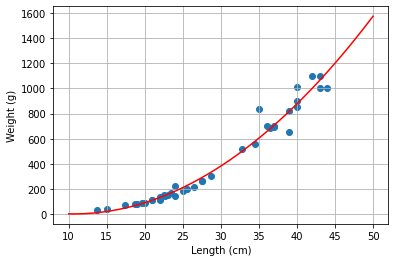

In [74]:
# train set 시각화 - scatter plot
plt.scatter(X_train, y_train)

# 2차항이 포함된 선형 회귀 곡선 시각화 - line plot
x_values = np.arange(10, 50, 0.0001).reshape((-1, 1))  # 컬럼 개수가 1개인 2d array
X_poly = np.c_[x_values, x_values ** 2]  # x와 x^2 항을 갖는 2d array
# y_values = lin_reg2.intercept_ + X_poly @ lin_reg2.coef_  # y = w0 + w1 * x + w2 * x^2
y_values = lin_reg2.predict(X_poly)
plt.plot(x_values, y_values, 'r')

plt.grid()
plt.xlabel('Length (cm)')
plt.ylabel('Weight (g)')
plt.show()

# PolynomialFeatures 변환기

**scikit-learn** 클래스

* **Estimator**(추정기, 예측기) 클래스
    * 머신 러닝 알고리즘을 구현한 클래스
    * `fit`, `predict` 메서드를 가지고 있음.
    * 예: `KNeighborsClassifier`, `KNeighborsRegressor`, `LinearRegression`
* **Transformer**(변환기) 클래스
    * 전처리 과정에서(모델을 학습시키기 전에), train/test set의 데이터들을 변환하는 클래스
    * `fit`, `transform`, `fit_transform` 메서드를 가지고 있음.
    * 예: `StandardScaler`, `MinMaxScaler`, `PolynomialFeatures`


In [75]:
# PolynomialFeatures 클래스 객체 생성
poly = PolynomialFeatures(include_bias=False)

# train set X_train에 2차항을 추가한 2d array 생성
X_train_poly = poly.fit_transform(X_train)
X_train_poly[:5]

array([[  19.6 ,  384.16],
       [  22.  ,  484.  ],
       [  18.7 ,  349.69],
       [  17.4 ,  302.76],
       [  36.  , 1296.  ]])

In [76]:
# test set X_test에 2차항을 추가한 2d array 생성
X_test_poly = poly.transform(X_test)
X_test_poly[:5]

array([[  8.4 ,  70.56],
       [ 18.  , 324.  ],
       [ 27.5 , 756.25],
       [ 21.3 , 453.69],
       [ 22.5 , 506.25]])

# PolynomialFeatures + StandardScaler

* 선형 회귀에서 차수(degree)가 커질 수록, 고차항이 저차항에 비해 예측값을 계산할 때 더 큰 영향을 끼치게 됨.
* 선형 회귀에서 고차항을 포함시킬 때는 일반적으로 scaling을 함께 사용하는 경우가 많음.

In [77]:
X_train[:5]  # train set 원본 - 고차항이 포함되지 않았고, scaling되지 않은 set

array([[19.6],
       [22. ],
       [18.7],
       [17.4],
       [36. ]])

In [78]:
poly = PolynomialFeatures(degree=3, include_bias=False)  # 다차항 변환기 생성

In [79]:
X_train_poly = poly.fit_transform(X_train)  # 3차항까지 추가
X_train_poly[:5]

array([[1.960000e+01, 3.841600e+02, 7.529536e+03],
       [2.200000e+01, 4.840000e+02, 1.064800e+04],
       [1.870000e+01, 3.496900e+02, 6.539203e+03],
       [1.740000e+01, 3.027600e+02, 5.268024e+03],
       [3.600000e+01, 1.296000e+03, 4.665600e+04]])

In [80]:
std_scaler = StandardScaler()  # 표준화 변환기 생성

In [81]:
X_train_poly_scaled = std_scaler.fit_transform(X_train_poly)
X_train_poly_scaled[:5]
#> 전처리가 끝난 훈련 데이터

array([[-1.01339619, -0.9549757 , -0.88757122],
       [-0.73842893, -0.76472563, -0.76291014],
       [-1.11650891, -1.02065999, -0.92715994],
       [-1.26544951, -1.11008743, -0.97797552],
       [ 0.86554673,  0.78258063,  0.67651527]])

In [82]:
# test set에서도 train set과 마찬가지로 (1) polynomial (2) scaling을 적용
X_test[:5]

array([[ 8.4],
       [18. ],
       [27.5],
       [21.3],
       [22.5]])

In [83]:
X_test_poly = poly.transform(X_test)  # 3차항까지 추가
X_test_poly[:5]

array([[8.4000000e+00, 7.0560000e+01, 5.9270400e+02],
       [1.8000000e+01, 3.2400000e+02, 5.8320000e+03],
       [2.7500000e+01, 7.5625000e+02, 2.0796875e+04],
       [2.1300000e+01, 4.5369000e+02, 9.6635970e+03],
       [2.2500000e+01, 5.0625000e+02, 1.1390625e+04]])

In [84]:
X_test_poly_scaled = std_scaler.transform(X_test_poly)  # 고차항이 추가된 행렬을 표준화
X_test_poly_scaled[:5]
#> 전처리가 끝난 테스트 셋

array([[-2.29657672, -1.55255604, -1.16487216],
       [-1.1967077 , -1.06961356, -0.95543049],
       [-0.10829564, -0.24593976, -0.35720728],
       [-0.81862772, -0.82248284, -0.8022618 ],
       [-0.68114409, -0.72232715, -0.73322359]])

In [85]:
lin_reg3 = LinearRegression()  # 머신 러닝 모델 생성

# 전처리가 끝난 train set으로 머신 러닝을 학습시킴.
lin_reg3.fit(X_train_poly_scaled, y_train)

# 훈련 셋의 예측값
train_pred = lin_reg3.predict(X_train_poly_scaled)

# R^2 score(결정 계수) 계산
r2_score(y_train, train_pred)

0.9729178478354534

In [86]:
# 전처리가 끝난 test set의 예측값
test_pred = lin_reg3.predict(X_test_poly_scaled)

# R^2 score 계산
r2_score(y_test, test_pred)

0.9588363727422972

train set에서는 score가 더 좋아짐.

test set에서는 score가 많이 나빠짐.

overfitting(과대적합): 훈련 셋에만 너무 맞춰진(fitted) 모델

# 다항회귀에서 과대적합(overfitting)

100차항을 포함하는 선형 회귀

$
\hat{y_i} = w_0 + w_1 \times x_i + w_2 \times x_i^2 + \cdots + w_{100} \times x_i^{100}
$

In [90]:
X_train.shape  # 훈련 셋

(42, 1)

훈련 셋에 100차항까지 추가

In [89]:
poly = PolynomialFeatures(degree=100, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_train_poly.shape

(42, 100)

모든 변수들을 표준화

In [91]:
std_scaler = StandardScaler()
X_train_poly_scaled = std_scaler.fit_transform(X_train_poly)
X_train_poly_scaled.shape

/usr/local/lib/python3.7/dist-packages/numpy/lib/nanfunctions.py:1544: RuntimeWarning: overflow encountered in multiply
  sqr = np.multiply(arr, arr, out=arr)


(42, 100)

테스트 셋에서도 
* 100차항까지 추가
* 표준화

In [92]:
X_test.shape

(14, 1)

In [94]:
X_test_poly = poly.transform(X_test)  # 100차항까지 추가
X_test_poly_scaled = std_scaler.transform(X_test_poly)  # 표준화 scaling
X_test_poly_scaled.shape

(14, 100)

머신 러닝 알고리즘 선택, 훈련

In [95]:
lin_reg100 = LinearRegression()  # 모델 생성

In [96]:
lin_reg100.fit(X_train_poly_scaled, y_train)  # 모델 훈련

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

훈련 셋 평가(evaluation)

In [97]:
train_pred = lin_reg100.predict(X_train_poly_scaled)  # 훈련 셋 예측값
train_pred[:5]

array([ 82.56233808, 125.07308027,  79.97640058,  69.94026777,
       699.98714277])

In [98]:
y_train[:5]  # 실제값

array([ 85., 135.,  78.,  70., 700.])

In [99]:
r2_score(y_train, train_pred)  # 훈련 셋에서의 R^2 score(결정 계수)

0.9927110456541561

테스트 셋 평가

In [100]:
test_pred = lin_reg100.predict(X_test_poly_scaled)
test_pred[:5]

array([-1.51806024e+07,  9.09695646e+01,  2.62264487e+02,  1.13381674e+02,
        1.38555502e+02])

In [101]:
y_test[:5]

array([  5.9, 100. , 250. , 130. , 130. ])

In [102]:
r2_score(y_test, test_pred)  # 테스트 셋에서의 결정 계수

-5539748134.396258

100차항까지 포함된 선형 회귀 모델은 굉장히 심한 과적합(overfitting).
훈련 셋의 데이터들을 거의 정확하게 무게를 예측하지만, 훈련이 되지 않은 테스트 셋의 데이터들은 오차가 크게 발생.

* 훈련 셋 - scatter plot
* 테스트 셋 - scatter plot
* 100차항을 포함하는 선형 회귀 곡선 - line plot

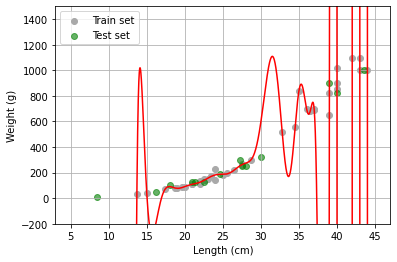

In [112]:
# 훈련 셋 시각화
plt.scatter(X_train, y_train, color='darkgray', label='Train set')
# 테스트 셋 시각화
plt.scatter(X_test, y_test, color='green', label='Test set', alpha=0.6)

# 선형 회귀 곡선 시각화
# 그래프를 그릴 때 필요한 x좌표들
X_values = np.arange(5, 45, 0.001).reshape((-1, 1))  # (n_samples, 1) shape의 2d array
X_values_poly = poly.transform(X_values)  # 100차항까지 추가
X_scaled = std_scaler.transform(X_values_poly)  # 표준화
# 그래프를 그릴 때 필요한 y좌표들을 계산
y_values = lin_reg100.predict(X_scaled)
# x, y 좌표들을 선으로 연결
plt.plot(X_values, y_values, 'r-')

plt.ylim((-200, 1500))  # 그래프를 그릴 y축의 범위
plt.grid()
plt.xlabel('Length (cm)')
plt.ylabel('Weight (g)')
plt.legend()
plt.show()

# Pipeline

In [114]:
# Pipeline으로 연결할 변환기(transformer), 추정기(estimator) 객체들을 생성
poly = PolynomialFeatures(degree=2, include_bias=False)  # polynomial 변환기 생성
std_scaler = StandardScaler()  # 표준화 변환기 생성
lin_reg = LinearRegression()  # 선형 회귀 추정기 생성

In [115]:
# 변환기와 추정기를 순서대로 연결하는 Pipeline 객체를 생성
model = Pipeline(steps=[('deg_2_poly', poly),
                        ('scaler', std_scaler),
                        ('reg', lin_reg)])

In [117]:
# 훈련 셋을 학습시킴
model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('deg_2_poly',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('reg',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [118]:
# Pipeline 객체가 가지고 있는 reg 객체(LinearRegression 객체)
model['reg'].coef_  # 선형 회귀 방정식의 w1, w2

array([-188.16429447,  532.30423546])

In [119]:
model['reg'].intercept_  # 선형 회귀 방정식의 w0

400.83333333333326

In [120]:
train_pred = model.predict(X_train)  # train set 예측값
train_pred[:5]

array([ 83.18070434, 132.71260219,  67.61880901,  48.04150559,
       654.5393253 ])

In [121]:
# test set의 예측값
test_pred = model.predict(X_test)
test_pred[:5]

array([  6.5349146 ,  56.6511646 , 290.29593158, 117.05874344,
       144.50252913])